In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r'C:\Users\karan\Downloads\k3.csv')
df

,step,customer,age,gender,zipcodeOri,merchant,zipMerchant,category,amount,fraud
0,0,'C1093826151','4','M','28007','M348934600','28007','es_transportation',4.55,0
1,0,'C352968107','2','M','28007','M348934600','28007','es_transportation',39.68,0
2,0,'C2054744914','4','F','28007','M1823072687','28007','es_transportation',26.89,0
3,0,'C1760612790','3','M','28007','M348934600','28007','es_transportation',17.25,0
4,0,'C757503768','5','M','28007','M348934600','28007','es_transportation',35.72,0
...,...,...,...,...,...,...,...,...,...,...
65530,24,'C720418898','3','M','28007','M348934600','28007','es_transportation',58.35,0
65531,24,'C194859196','2','F','28007','M1823072687','28007','es_transportation',24.76,0
65532,24,'C1209743372','4','F','28007','M1823072687','28007','es_transportation',18.82,0
65533,24,'C1821681988','2','F','28007','M1823072687','28007','es_transportation',9.77,0


In [3]:
df.shape

(65535, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   step         65535 non-null  int64  
 1   customer     65535 non-null  object 
 2   age          65535 non-null  object 
 3   gender       65535 non-null  object 
 4   zipcodeOri   65535 non-null  object 
 5   merchant     65535 non-null  object 
 6   zipMerchant  65535 non-null  object 
 7   category     65535 non-null  object 
 8   amount       65535 non-null  float64
 9   fraud        65535 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 5.0+ MB


In [5]:
df.describe()

,step,amount,fraud
count,65535.000000,65535.000000,65535.000000
mean,12.216358,39.727756,0.015106
std,7.136616,129.053485,0.121977
min,0.000000,0.000000,0.000000
25%,6.000000,13.860000,0.000000
50%,12.000000,26.930000,0.000000
75%,18.000000,42.810000,0.000000
max,24.000000,7432.480000,1.000000


In [6]:
df.isnull().sum()

step           0
customer       0
age            0
gender         0
zipcodeOri     0
merchant       0
zipMerchant    0
category       0
amount         0
fraud          0
dtype: int64

<AxesSubplot: xlabel='fraud', ylabel='count'>

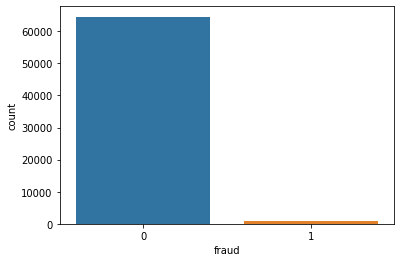

In [7]:
sns.countplot(x="fraud",data=df)

In [8]:
df.drop(["zipcodeOri"],axis=1,inplace=True)

In [9]:
df.drop(["zipMerchant"],axis=1,inplace=True)

In [10]:
df["gender"].value_counts()

'F'    35958
'M'    29410
'E'       98
'U'       69
Name: gender, dtype: int64

In [11]:
catcol=df.select_dtypes(object).columns
catcol

Index(['customer', 'age', 'gender', 'merchant', 'category'], dtype='object')

In [12]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df[catcol]=oe.fit_transform(df[catcol])

In [13]:
df

,step,customer,age,gender,merchant,category,amount,fraud
0,0,197.0,4.0,2.0,30.0,12.0,4.55,0
1,0,2604.0,2.0,2.0,30.0,12.0,39.68,0
2,0,2160.0,4.0,1.0,18.0,12.0,26.89,0
3,0,1554.0,3.0,2.0,30.0,12.0,17.25,0
4,0,3388.0,5.0,2.0,30.0,12.0,35.72,0
...,...,...,...,...,...,...,...,...
65530,24,3311.0,3.0,2.0,30.0,12.0,58.35,0
65531,24,1943.0,2.0,1.0,18.0,12.0,24.76,0
65532,24,446.0,4.0,1.0,18.0,12.0,18.82,0
65533,24,1692.0,2.0,1.0,18.0,12.0,9.77,0


In [14]:
df["fraud"].value_counts()

0    64545
1      990
Name: fraud, dtype: int64

In [15]:
features=df[["customer","age","gender","merchant","category","amount"]]

In [16]:
from scipy.stats import zscore #skewness
z=np.abs(zscore(features))
z

,customer,age,gender,merchant,category,amount
0,1.554690,0.741750,1.095705,0.426772,0.313524,0.272585
1,0.607578,0.753546,1.095705,0.426772,0.313524,0.000370
2,0.208722,0.741750,0.894236,1.096954,0.313524,0.099477
3,0.335663,0.005898,1.095705,0.426772,0.313524,0.174175
4,1.311865,1.489397,1.095705,0.426772,0.313524,0.031055
...,...,...,...,...,...,...
65530,1.242694,0.005898,1.095705,0.426772,0.313524,0.144300
65531,0.013786,0.753546,0.894236,1.096954,0.313524,0.115982
65532,1.331007,0.741750,0.894236,1.096954,0.313524,0.162010
65533,0.211694,0.753546,0.894236,1.096954,0.313524,0.232136


In [17]:
newdf=df[(z<3).all(axis=1)] #outliers
newdf

,step,customer,age,gender,merchant,category,amount,fraud
0,0,197.0,4.0,2.0,30.0,12.0,4.55,0
1,0,2604.0,2.0,2.0,30.0,12.0,39.68,0
2,0,2160.0,4.0,1.0,18.0,12.0,26.89,0
3,0,1554.0,3.0,2.0,30.0,12.0,17.25,0
4,0,3388.0,5.0,2.0,30.0,12.0,35.72,0
...,...,...,...,...,...,...,...,...
65530,24,3311.0,3.0,2.0,30.0,12.0,58.35,0
65531,24,1943.0,2.0,1.0,18.0,12.0,24.76,0
65532,24,446.0,4.0,1.0,18.0,12.0,18.82,0
65533,24,1692.0,2.0,1.0,18.0,12.0,9.77,0


In [18]:
newdf["fraud"].value_counts()

0    61756
1      541
Name: fraud, dtype: int64

In [19]:
newdf.shape

(62297, 8)

In [20]:
x=newdf.iloc[:,:-1]
x

,step,customer,age,gender,merchant,category,amount
0,0,197.0,4.0,2.0,30.0,12.0,4.55
1,0,2604.0,2.0,2.0,30.0,12.0,39.68
2,0,2160.0,4.0,1.0,18.0,12.0,26.89
3,0,1554.0,3.0,2.0,30.0,12.0,17.25
4,0,3388.0,5.0,2.0,30.0,12.0,35.72
...,...,...,...,...,...,...,...
65530,24,3311.0,3.0,2.0,30.0,12.0,58.35
65531,24,1943.0,2.0,1.0,18.0,12.0,24.76
65532,24,446.0,4.0,1.0,18.0,12.0,18.82
65533,24,1692.0,2.0,1.0,18.0,12.0,9.77


In [21]:
y=newdf.iloc[:,-1]
y

0        0
1        0
2        0
3        0
4        0
        ..
65530    0
65531    0
65532    0
65533    0
65534    0
Name: fraud, Length: 62297, dtype: int64

In [22]:
#sns.pairplot(newdf)

In [23]:
#sns.pairplot(newdf,hue="fraud")

<AxesSubplot: >

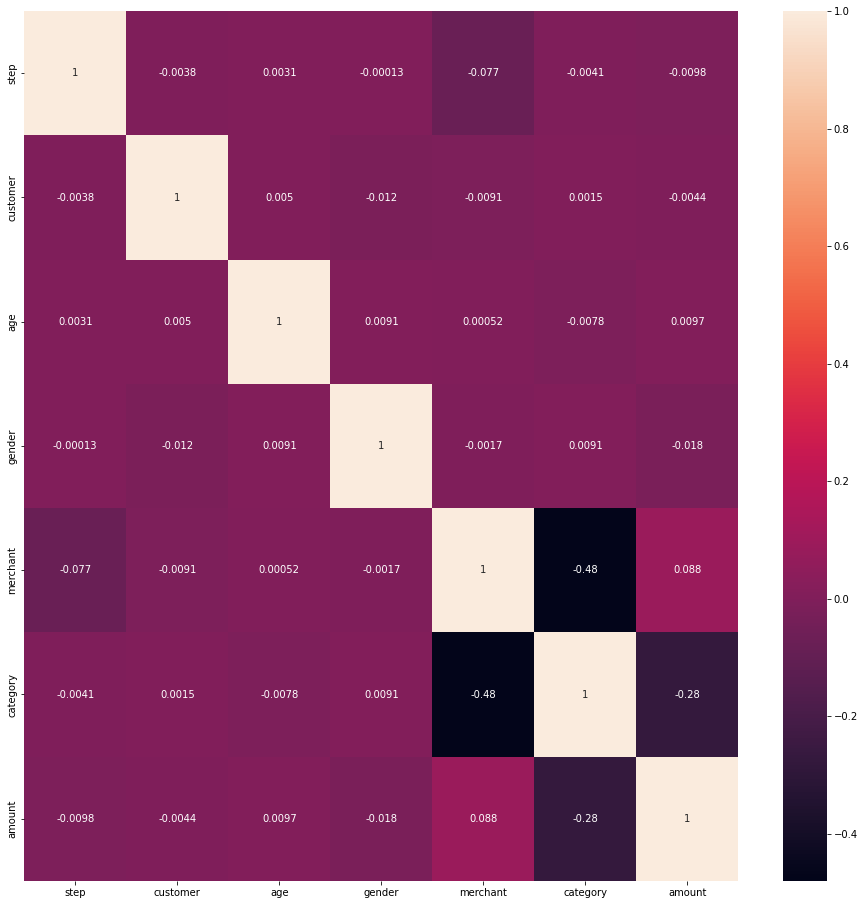

In [24]:
plt.figure(figsize=(16,16))
sns.heatmap(x.corr(),annot=True)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [27]:
#logistic

In [28]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cr=classification_report(ytest,ypred)
print(f"Accuracy:{ac}\n{cr}")

Accuracy:0.9929909042268593
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18521
           1       0.72      0.37      0.49       169

    accuracy                           0.99     18690
   macro avg       0.86      0.68      0.74     18690
weighted avg       0.99      0.99      0.99     18690



In [30]:
train=logreg.score(xtrain,ytrain)
test=logreg.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTesting Accuracy{test}")

Training Accuracy:0.9932808952691081
Testing Accuracy0.9929909042268593


In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=56)#20 best
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [32]:
cr=classification_report(ytest,ypred)
acc=accuracy_score(ytest,ypred)
print(f"Accuracy score:{acc}\n{cr}")

Accuracy score:0.991653290529695
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     18521
           1       0.84      0.09      0.17       169

    accuracy                           0.99     18690
   macro avg       0.92      0.55      0.58     18690
weighted avg       0.99      0.99      0.99     18690



In [33]:
train=knn.score(xtrain,ytrain)
test=knn.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTesting Accuracy{test}")

Training Accuracy:0.9926846607196093
Testing Accuracy0.991653290529695


In [34]:
abc=AdaBoostClassifier(n_estimators=100,random_state=1)#100,1 best
abc.fit(xtrain,ytrain)
ypred=abc.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18521
           1       0.73      0.46      0.57       169

    accuracy                           0.99     18690
   macro avg       0.86      0.73      0.78     18690
weighted avg       0.99      0.99      0.99     18690



In [35]:
train=abc.score(xtrain,ytrain)
test=abc.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTesting Accuracy{test}")

Training Accuracy:0.9947256174467402
Testing Accuracy0.9935794542536116


In [36]:
rf=RandomForestClassifier(n_estimators=61,max_depth=8)
rf.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=8, n_estimators=61)

In [37]:
ypred=rf.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18521
           1       0.73      0.51      0.60       169

    accuracy                           0.99     18690
   macro avg       0.86      0.75      0.80     18690
weighted avg       0.99      0.99      0.99     18690



In [38]:
train=rf.score(xtrain,ytrain)
test=rf.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTesting Accuracy{test}")

Training Accuracy:0.9966060494874676
Testing Accuracy0.9938469769930444


In [39]:
dtc2=DecisionTreeClassifier(max_depth=8,min_samples_leaf=29)
dtc2.fit(xtrain,ytrain)
ypred=dtc2.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18521
           1       0.75      0.48      0.58       169

    accuracy                           0.99     18690
   macro avg       0.87      0.74      0.79     18690
weighted avg       0.99      0.99      0.99     18690



In [40]:
train=dtc2.score(xtrain,ytrain)
test=dtc2.score(xtest,ytest)
print(f"Training Accuracy:{train}\nTesting Accuracy{test}")

Training Accuracy:0.9948402779370284
Testing Accuracy0.9938469769930444
